# Preface

# Import 
## Import Library
First, import library needed to solve the problem

In [1]:
import os
import zipfile
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Dense, Input, Dropout, Activation
from keras.layers import Bidirectional, LSTM, Embedding, GlobalMaxPool1D
from keras import initializers, regularizers, constraints, optimizers, layers
from keras import backend as K
from keras import callbacks
from sklearn.model_selection import train_test_split

## Import Dataset

In [2]:
samplesub_zip = '../input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip'
test_zip = '../input/jigsaw-toxic-comment-classification-challenge/test.csv.zip'
test_labels_zip = '../input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip'
train_zip = '../input/jigsaw-toxic-comment-classification-challenge/train.csv.zip'

for file_dir in [samplesub_zip, test_zip, test_labels_zip, train_zip]:
  zip_ref = zipfile.ZipFile(file_dir, 'r')
  zip_ref.extractall('./jigsawtoxic/')
  zip_ref.close()

base_dir = './jigsawtoxic/'
os.listdir('./jigsawtoxic/')

['test.csv', 'sample_submission.csv', 'test_labels.csv', 'train.csv']

# EDA (Exploratory Data Analysis)
We take a look inside of the dataset, train set and test set, also what the submission be like

In [3]:
train = pd.read_csv('./jigsawtoxic/train.csv')
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
test = pd.read_csv('./jigsawtoxic/test.csv')
test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [5]:
test_labels = pd.read_csv('./jigsawtoxic/test_labels.csv')
test_labels

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,-1,-1,-1,-1,-1,-1
153160,fffd7a9a6eb32c16,-1,-1,-1,-1,-1,-1
153161,fffda9e8d6fafa9e,-1,-1,-1,-1,-1,-1
153162,fffe8f1340a79fc2,-1,-1,-1,-1,-1,-1


In [6]:
sample_submission = pd.read_csv('./jigsawtoxic/sample_submission.csv')
sample_submission

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.5,0.5,0.5,0.5,0.5,0.5
153160,fffd7a9a6eb32c16,0.5,0.5,0.5,0.5,0.5,0.5
153161,fffda9e8d6fafa9e,0.5,0.5,0.5,0.5,0.5,0.5
153162,fffe8f1340a79fc2,0.5,0.5,0.5,0.5,0.5,0.5


In [7]:
for list_columns in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
    print(train[list_columns].value_counts())

0    144277
1     15294
Name: toxic, dtype: int64
0    157976
1      1595
Name: severe_toxic, dtype: int64
0    151122
1      8449
Name: obscene, dtype: int64
0    159093
1       478
Name: threat, dtype: int64
0    151694
1      7877
Name: insult, dtype: int64
0    158166
1      1405
Name: identity_hate, dtype: int64


In [8]:
for list_columns in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
    print(test_labels[list_columns].value_counts())

-1    89186
 0    57888
 1     6090
Name: toxic, dtype: int64
-1    89186
 0    63611
 1      367
Name: severe_toxic, dtype: int64
-1    89186
 0    60287
 1     3691
Name: obscene, dtype: int64
-1    89186
 0    63767
 1      211
Name: threat, dtype: int64
-1    89186
 0    60551
 1     3427
Name: insult, dtype: int64
-1    89186
 0    63266
 1      712
Name: identity_hate, dtype: int64


from dataset page description value of -1 indicates it was not used for scoring; (Note: file added after competition close and this notebook was made after the competition over)

Drop column that are not needed for training

In [9]:
train = train.drop(columns=["id"])

In [10]:
print(train.isnull().any(), "\n")
print(test_labels.isnull().any())

comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool 

id               False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool


*Note: if false, then there are no null value in dataset

# Tokenization

In [11]:
data_train = train['comment_text']
data_labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
y_train = train[data_labels].values
data_test = test['comment_text']

In [13]:
embed_size = 50             # how big is each word vector
max_features = 20000        # how many unique words to use (i.e num rows in embedding vector)
maxlen = 200                # max number of words in a comment to use

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(data_train))

list_tokenized_train = tokenizer.texts_to_sequences(data_train)
list_tokenized_test = tokenizer.texts_to_sequences(data_test)

X_train = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_test = pad_sequences(list_tokenized_test, maxlen=maxlen)

We're gonna use embedding from other pre-trained word vector dataset to make it faster and not training Jigsaw Toxic Commment from beginning.

GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

In this notebook, we're gonna use version 6B50d

In [14]:
glove_embedding = '../input/glove6b50dtxt/glove.6B.50d.txt'

def get_coefs(word, *arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.strip().split()) for o in open(glove_embedding))

In [15]:
all_embs = np.stack(embeddings_index.values())
emb_mean, emb_std = all_embs.mean(), all_embs.std()
emb_mean, emb_std

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3357: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


(0.020940498, 0.6441043)

In [16]:
word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

In [17]:
total_num_words = [len(one_comment) for one_comment in list_tokenized_train]

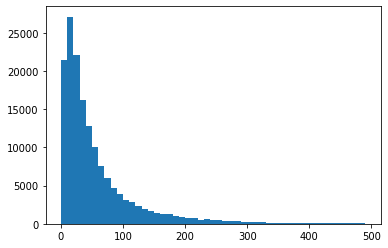

In [18]:
plt.hist(total_num_words, bins = np.arange(0, 500, 10))
plt.show()

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_features, output_dim=embed_size, 
                              input_length=maxlen, weights=[embedding_matrix]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(60, return_sequences=True, 
                                                       dropout=0.1, recurrent_dropout=0.1)),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(6, activation='softmax')])    # 6 is total classes and since the classes more than 2 then we're gonna use softmax as the last activation ion dense layer

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# use binary crossentropy is because each label or feature only have 2 value, 0 or 1

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 50)           1000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200, 120)          53280     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 120)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                6050      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                

Using callbacks.EarlyStopping with val_loss as monitor to make training stopped if validation loss not increasing, and the training will stop since after 5 epoch

In [23]:
early_stopping_cb = callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [25]:
batch_size = 2048
epochs = 100

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                    validation_split=0.2,     # validation set is 20% of dataset
                    callbacks=[early_stopping_cb], verbose=1)

Epoch 1/100
63/63 [==============================] - 113s 2s/step - loss: 0.1425 - accuracy: 0.6484 - val_loss: 0.1141 - val_accuracy: 0.7748
Epoch 2/100
63/63 [==============================] - 113s 2s/step - loss: 0.0923 - accuracy: 0.5533 - val_loss: 0.0671 - val_accuracy: 0.9209
Epoch 3/100
63/63 [==============================] - 113s 2s/step - loss: 0.0630 - accuracy: 0.7507 - val_loss: 0.0562 - val_accuracy: 0.9929
Epoch 4/100
63/63 [==============================] - 112s 2s/step - loss: 0.0556 - accuracy: 0.7758 - val_loss: 0.0529 - val_accuracy: 0.9939
Epoch 5/100
63/63 [==============================] - 111s 2s/step - loss: 0.0517 - accuracy: 0.8168 - val_loss: 0.0509 - val_accuracy: 0.9940
Epoch 6/100
63/63 [==============================] - 112s 2s/step - loss: 0.0498 - accuracy: 0.8447 - val_loss: 0.0497 - val_accuracy: 0.9941
Epoch 7/100
63/63 [==============================] - 112s 2s/step - loss: 0.0480 - accuracy: 0.8541 - val_loss: 0.0491 - val_accuracy: 0.9920
Epoch 

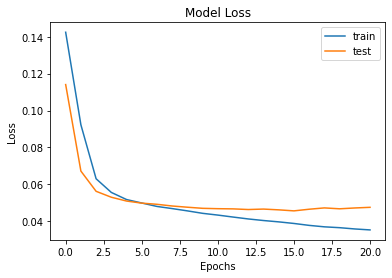

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

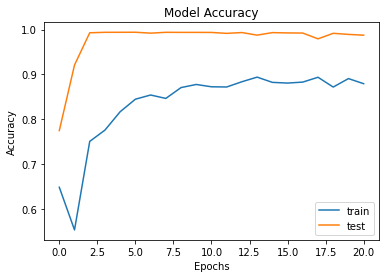

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

make prediction using trained model for test set and submit the submission

In [35]:
y_test = model.predict([X_test], batch_size=16, verbose=1)

9573/9573 [==============================] - 896s 94ms/step


In [36]:
sample_submission = pd.read_csv('./jigsawtoxic/sample_submission.csv')
sample_submission[data_labels] = y_test
sample_submission.to_csv('submission.csv', index=False)

In [37]:
sample_submission

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.915199,0.001180,0.057956,0.000312,0.024073,0.001279
1,0000247867823ef7,0.582971,0.003347,0.321312,0.007412,0.077361,0.007597
2,00013b17ad220c46,0.546816,0.012976,0.297228,0.034196,0.095793,0.012990
3,00017563c3f7919a,0.578624,0.003185,0.325168,0.007689,0.079388,0.005947
4,00017695ad8997eb,0.678119,0.005099,0.220703,0.012052,0.074642,0.009386
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.785685,0.000767,0.146836,0.000225,0.065954,0.000533
153160,fffd7a9a6eb32c16,0.728330,0.006323,0.148150,0.016332,0.088426,0.012440
153161,fffda9e8d6fafa9e,0.592065,0.001691,0.337260,0.004485,0.056509,0.007990
153162,fffe8f1340a79fc2,0.443075,0.007617,0.182748,0.124060,0.044315,0.198184


# Reference:
* https://nlp.stanford.edu/projects/glove/